### --- Task 2 & 3: 4-Qubit Search with Optimal Iterations --- ###
Marked state: 1101
Number of qubits (n): 4
Total states (N): 16
Optimal iterations (approx): 3

Visualizing 4-Qubit Circuit:


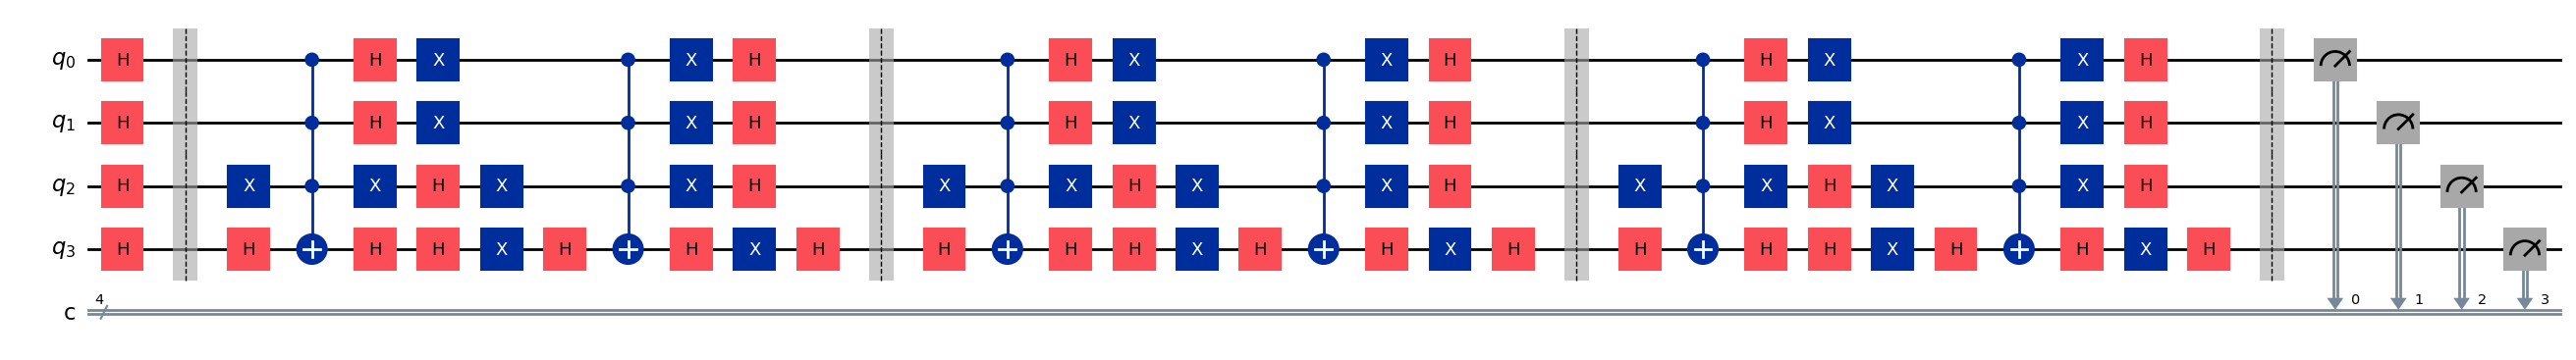

Results for: Ideal 4-Qubit Search for '1101'

### --- Task 5: Experiment with Noise --- ###
Results for: Noisy 4-Qubit Search for '1101'
Compare the ideal and noisy histograms. 
Note how noise reduces the peak probability of the marked state.

### --- Task 1: Change the Marked State (n=3) --- ###
Marked state: 001
Number of qubits (n): 3
Optimal iterations (approx): 2

Visualizing 3-Qubit Circuit:


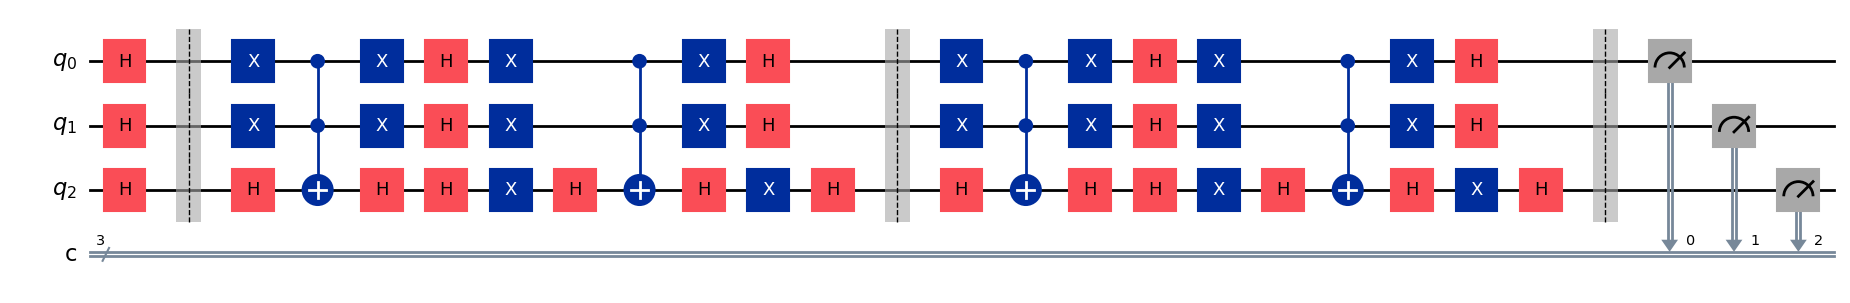

Results for: Ideal 3-Qbit Search for '001'


In [1]:
# Install necessary Qiskit packages AND the 'mpl' dependency
!pip install qiskit qiskit-aer pylatexenc

# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel, depolarizing_error
from IPython.display import display

# --- Original Functions (Modified for Iterations) ---

def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state.
    This function is general and works for any n.
    """
    # Flip bits marked '0' to '1'
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

    # Apply the multi-controlled Z-gate (implemented as H-MCX-H)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # (n-1) controls, 1 target
    qc.h(n - 1)

    # Flip bits back
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

def diffuser(qc, n):
    """Implements the Grover diffuser (inversion about the mean).
    This function is general and works for any n.
    """
    qc.h(range(n))
    qc.x(range(n))

    # Apply the multi-controlled Z-gate
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)

    qc.x(range(n))
    qc.h(range(n))

# --- Modified Functions ---

def grover_search(marked_state, iterations=1):
    """
    Builds Grover's search circuit for a given marked state
    and a specified number of iterations.
    """
    n = len(marked_state)
    qc = QuantumCircuit(n, n)

    # 1. Start with uniform superposition
    qc.h(range(n))

    # 2. Add barrier for visualization
    qc.barrier()

    # 3. TASK 3: Add multiple iterations
    # Run the oracle and diffuser steps 'iterations' times
    for _ in range(iterations):
        oracle(qc, n, marked_state)
        diffuser(qc, n)
        qc.barrier()

    # 4. Measure all qubits
    qc.measure(range(n), range(n))
    return qc

def get_simple_noise_model():
    """TASK 5: Creates a simple depolarizing noise model."""
    noise_model = NoiseModel()

    # 0.5% error on single-qubit gates
    error_1 = depolarizing_error(0.005, 1)
    # 5% error on two-qubit gates (like CX)
    # The transpiler will break down mcx into cx and single-qubit gates
    error_2 = depolarizing_error(0.05, 2)

    # Apply to common basis gates
    noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3', 'h', 'x'])
    noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

    return noise_model

def run_grover(qc, title="Grover Search Results", noise_model=None):
    """
    Executes the Grover circuit on an AerSimulator,
    optionally applying a noise model, and displays the result.
    """
    # Set up the simulator based on whether noise is requested
    if noise_model:
        simulator = AerSimulator(noise_model=noise_model)
    else:
        simulator = AerSimulator()

    # Transpile the circuit for the simulator
    compiled_circuit = transpile(qc, simulator)

    # Run the simulation
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()

    # Plot and show the histogram
    print(f"Results for: {title}")
    plot_histogram(counts, title=title)
    plt.show()

# --- Main execution block ---
if __name__ == "__main__":

    print("### --- Task 2 & 3: 4-Qubit Search with Optimal Iterations --- ###")

    # TASK 2: Modify the number of qubits (n=4)
    marked_state_n4 = "1101" # A 4-qubit marked state
    n_4 = len(marked_state_n4)
    N_4 = 2**n_4

    # TASK 3: Calculate optimal iterations
    # R ≈ (π/4) * sqrt(N/M) where M=1
    optimal_iterations_n4 = int(np.round((np.pi / 4) * np.sqrt(N_4 / 1)))

    print(f"Marked state: {marked_state_n4}")
    print(f"Number of qubits (n): {n_4}")
    print(f"Total states (N): {N_4}")
    print(f"Optimal iterations (approx): {optimal_iterations_n4}")

    # Build the 4-qubit circuit
    qc_n4 = grover_search(marked_state_n4, iterations=optimal_iterations_n4)

    # TASK 4: Circuit Visualization using 'mpl'
    print("\nVisualizing 4-Qubit Circuit:")
    display(qc_n4.draw('mpl', fold=-1))

    # Run the ideal (noiseless) simulation
    run_grover(qc_n4, title=f"Ideal 4-Qubit Search for '{marked_state_n4}'")

    # ---

    print("\n### --- Task 5: Experiment with Noise --- ###")

    # Get the noise model
    simple_noise_model = get_simple_noise_model()

    # Run the noisy simulation
    run_grover(qc_n4,
               title=f"Noisy 4-Qubit Search for '{marked_state_n4}'",
               noise_model=simple_noise_model)
    print("Compare the ideal and noisy histograms. \nNote how noise reduces the peak probability of the marked state.")

    # ---

    print("\n### --- Task 1: Change the Marked State (n=3) --- ###")

    # Try a different 3-qubit marked state
    marked_state_n3 = "001"
    n_3 = len(marked_state_n3)
    N_3 = 2**n_3
    optimal_iterations_n3 = int(np.round((np.pi / 4) * np.sqrt(N_3 / 1)))

    print(f"Marked state: {marked_state_n3}")
    print(f"Number of qubits (n): {n_3}")
    print(f"Optimal iterations (approx): {optimal_iterations_n3}")

    # Build the 3-qubit circuit
    qc_n3 = grover_search(marked_state_n3, iterations=optimal_iterations_n3)

    # TASK 4 (again): Visualize the 3-qubit circuit
    print("\nVisualizing 3-Qubit Circuit:")
    display(qc_n3.draw('mpl', fold=-1))

    # Run the ideal simulation for the 3-qubit case
    run_grover(qc_n3, title=f"Ideal 3-Qbit Search for '{marked_state_n3}'")